# Ejercicio de Regresion Lineal

En este notebook vamos a describir paso a paso un ejercicio de prediccion, a traves de regresion lineal, de la cantidad de ocasiones en que se comparte un articulo del area de Machine Learning en un Blog

## Prediccion: Cantidad de ocasiones en que se comparte un articulo de un Blog

Se inicia importando, ajustando y visualizando los datos

In [1]:
#Importamos librerias y ajustes necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#se carga el archivo de datos de entradas csv como dataset de Pandas. Los datos provienen del sitio web https://www.kdnuggets.com
data=pd.read_csv("./articulos de blog ml.csv")

Pandas es una libreria de Python destinada a analisis de datos, que proporciona estructuras de datos flexibles las cuales permiten trabajar con ellos de forma eficiente. Pandas ofrece las siguientes estructuras de datos: Series: Son arrays con indexacion (arrays con indice o etiquetados), similar a los diccionarios. Puede generarse a partir de diccionarios de las listas. Dataframe: Son estructuras de datos similares a las tables de base de base de datos relaciones con SQL. Panel, Panel4D y PanelND: Son estructuras de datos que permite trabajar con mas de 2 dimensiones

In [3]:
#Revisamos la dimension (registros x columnas) que contiene el archivo
data.shape

(161, 8)

In [4]:
#Podemos revisar los primeros registros para comprobar el funcionamiento
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


vemos que algunos atributos (columnas) tienen valores NaN; por ejemplo, en el atributo "url".
En este caso el atributo Shares sera la salida; es decir, el valor "Y" del modelo regresion lineal, el valor "Y" del modelo regresion lineal, el valor que se desea predecir

In [5]:
#Se realiza estadistica descriptiva para tener un conocimiento inicial de los datos:
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


Se observa, por ejemplo, la media del atributo Word count (cantidad de palabras) es de 1808.26.
Tambien se observa que el articulo mas pequeño contiene 250 palabras y el mas grande tiene 8401 palabras. Con respecto. Con respecto a cuanto se ha compartido un articulo (#Shares), existe los que nunca se han compartido (o veces) y los mas recurrentes con 350,000 ocasiones (muy popular!)

## Visualizacion General

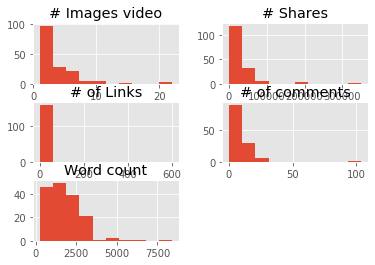

In [6]:
#Se visualizan los atributos de entrada mediante histogramas y barras (cuantitativas y cualitativas)
data.drop(['Title', 'url', 'Elapsed days'], 1).hist()
plt.show()

Las graficas anteriores comunican entre que valores se concentran la mayoria de los registros. Seguidamente se filtran los datos por cantidad de palabras dejando los registros con menos de 3500 y tambien #Shares con menos de 80.00

### Se puede visualizar por ejemplo Cantidad de palabras vs compartidos  

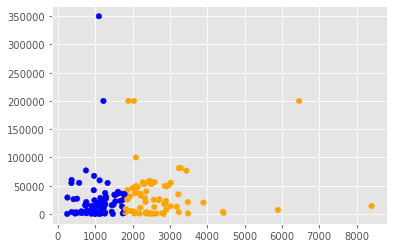

In [10]:
#Visualizar datos de entrada
colores= ['orange', 'blue']
tamanios=[30, 60]

f1= data['Word count'].values
f2= data['# Shares'].values

#pintar en 2 colores los puntos por debajo de la media de cantidad de palabras
asignar= []
for index,row in data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
        
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [11]:
#visualizar los datos en la zona donde se concentran mas los puntos
#esto es en el eje x: entre 0 y 3500
#en el eje y: entre 0 y 80.00
filtered_data= data[data['Word count'] <= 3500 & (data['#Shares'] <= 80000)]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

#Pintar en colores los puntos por debajo y por encima de la media de cantidad de palabras
asignar=[]
for index,row in data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

KeyError: '#Shares'

In [9]:
# Se revisan los cambios de valores una vez filtrados
filtered_data.describe()

NameError: name 'filtered_data' is not defined

### Regresion lineal simple (1 atributo con Python y SKLearn)

In [12]:
#Se asigna el atributo de entrada X para entrenamiento y las etiquetas Y
dataX= filtered_data[["Word count"]]
X_train = np.array(dataX)
Y_train = filtered_data['# Shares'].values

NameError: name 'filtered_data' is not defined

In [ ]:
#Se genera el objeto de regresion lineal
regr = linear_model.LinearRegression()

# Se entre el modelo
y_pred = regr.predict(X_train)

# Se revisa los coeficientes obtenidos, en este caso sera la tangente
print('Coeficientes: \n', regr.intercept_)

#Error de cuadrado medio
print('Media del error cuadrado %.2f' %mean_squared_error(Y_train, y_pred))
#puntaje de varianza. El mejor puntaje es un 1.0
print('Puntaje de varianza: %.2f')